In [1]:
#connessione al dataset "owid-covid-data.csv"
import pandas as pd
file="owid-covid-data.csv"
file_path="../Jupyter/dati py epicode/"
percorso=file_path+file

df=pd.read_csv(filepath_or_buffer=percorso)
df.head(5)


iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   
2            64.83                    0.511  41128772.0   
3            64.83                    0.511  41128772.0   
4            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [2]:
#overview sulle dimensioni e i dati del dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387201 entries, 0 to 387200
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387201 non-null  object 
 1   continent                                   368695 non-null  object 
 2   location                                    387201 non-null  object 
 3   date                                        387201 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

In [3]:
#verifica generale dei record duplicati
df.loc[df.duplicated()]

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, population, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million]
Index: []

[0 rows x 67 columns]

In [4]:
#conteggio dei valori univoci e dei valori nulli per ogni colonna
for column in df.columns:
    valori_univoci= df[column].nunique()
    print(f"{column} --> {valori_univoci} valori univoci")
    valori_nulli= df[column].isna().sum()
    print(f"{column} --> {valori_nulli} valori nulli \n")
    

iso_code --> 255 valori univoci
iso_code --> 0 valori nulli 

continent --> 6 valori univoci
continent --> 18506 valori nulli 

location --> 255 valori univoci
location --> 0 valori nulli 

date --> 1550 valori univoci
date --> 0 valori nulli 

total_cases --> 34417 valori univoci
total_cases --> 38868 valori nulli 

new_cases --> 14034 valori univoci
new_cases --> 10921 valori nulli 

new_cases_smoothed --> 14034 valori univoci
new_cases_smoothed --> 12151 valori nulli 

total_deaths --> 16040 valori univoci
total_deaths --> 61092 valori nulli 

new_deaths --> 3514 valori univoci
new_deaths --> 10612 valori nulli 

new_deaths_smoothed --> 3514 valori univoci
new_deaths_smoothed --> 11842 valori nulli 

total_cases_per_million --> 39272 valori univoci
total_cases_per_million --> 38868 valori nulli 

new_cases_per_million --> 31527 valori univoci
new_cases_per_million --> 10921 valori nulli 

new_cases_smoothed_per_million --> 26362 valori univoci
new_cases_smoothed_per_million --> 1215

In [5]:
import pandas as pd
df
nan_c=df[df["continent"].isna()]


In [7]:
#totlae casi localizzabili
all_cont = df.groupby("continent")
tot_cases_loc= all_cont.total_cases.max().sum()
print("totale casi localizzabili:\n", tot_cases_loc)

#casi per continente
print("\ntotale casi localizzabili per continente:")
all_cont.total_cases.max()

totale casi localizzabili:
 295182134.0

totale casi localizzabili per continente:


continent
Africa             4072636.0
Asia              99343195.0
Europe            38997490.0
North America    103436829.0
Oceania           11812024.0
South America     37519960.0
Name: total_cases, dtype: float64

In [8]:
#descrizione statistica dei casi globali (inclusi i non localizzati)
filtro_globale=df.total_cases.describe().round()
filtro_globale

count       348333.0
mean       7386532.0
std       43985088.0
min              1.0
25%           9448.0
50%          79713.0
75%         851668.0
max      774954379.0
Name: total_cases, dtype: float64

In [9]:
#INPUT casi totali
all_cont

cont1=input()
continente_1 = all_cont.get_group(cont1).total_cases.describe().round()

cont2=input()
continente_2 = all_cont.get_group(cont2).total_cases.describe().round()

cont3=input()
continente_3 = all_cont.get_group(cont3).total_cases.describe().round()
#calcolo dati

#statistiche casi CASI TOTALI (inclusi nan)
tot_cases_sum= df["total_cases"].sum()
tot_cases_min= df["total_cases"].min()
tot_cases_max= df["total_cases"].max()
tot_cases_mean= df["total_cases"].mean()
tot_cases_pof= tot_cases_sum/(df["total_cases"].sum()/100)

#statistiche CONTINENTE 1
c1_sum = continente_1.sum()
c1_min = continente_1.min()
c1_max = continente_1.max()
c1_mean = continente_1.mean()
c1_pof = continente_1.sum()/(df["total_cases"].sum()/100)

#statistiche CONTINENTE 2
c2_sum = continente_2.sum()
c2_min = continente_2.min()
c2_max = continente_2.max()
c2_mean = continente_2.mean()
c2_pof = continente_2.sum()/(df["total_cases"].sum()/100)

#statistiche CONTINENTE 3
c3_sum = continente_3.sum()
c3_min = continente_3.min()
c3_max = continente_3.max()
c3_mean = continente_3.mean()
c3_pof = continente_3.sum()/(df["total_cases"].sum()/100)

                             
#creazione tabella
dati_globali=[tot_cases_sum,tot_cases_min,tot_cases_max,tot_cases_mean,tot_cases_pof]
risultati=["tot","min","max","mean","p_of"]
continente_1 = [c1_sum, c1_min ,c1_max ,c1_mean ,c1_pof]
continente_2= [c2_sum, c2_min ,c2_max ,c2_mean ,c2_pof]
continente_3= [c3_sum, c3_min ,c3_max ,c3_mean ,c3_pof]

#alimentazione tabella
df_confronto=pd.DataFrame()
df_confronto["risultati"]=risultati
df_confronto["dati_globali"]=dati_globali
df_confronto["continente_1"]=continente_1
df_confronto["continente_2"]=continente_2
df_confronto["continente_3"]=continente_3
df_confronto

#print e compilazione report
print("\nDal report si evidenzia che \n includendo nel totale i non localizzati rispetto gli espliciti:\n")

print(cont1,"rappresenta il:",c1_pof,"% dei casi mondiali")
print(cont2,"rappresenta il:",c2_pof,"% dei casi mondiali")
print(cont3,"rappresenta il:",c3_pof,"% dei casi mondiali")

print("\n rispetto la media invece di:", tot_cases_mean.round(), "casi \n")

if c1_mean > tot_cases_mean:
    print(cont1,"supera la media con:", c1_mean.round(), "casi in media")
elif c1_mean < tot_cases_mean:
    print(cont1,"è inferiore alla media con:", c1_mean.round(), "casi in media")

if c2_mean > tot_cases_mean:
    print(cont2,"supera la media con:", c2_mean.round(), "casi in media")
elif c2_mean < tot_cases_mean:
    print(cont2,"è inferiore alla media con:", c2_mean.round(), "casi in media")

if c3_mean > tot_cases_mean:
    print(cont3,"supera la media con:", c3_mean.round(), "casi in media")
elif c3_mean < tot_cases_mean:
    print(cont3,"è inferiore alla media con:", c3_mean.round(), "casi in media")

print("\n rispetto al massimo di:", tot_cases_max, "casi invece: \n")

print( cont1, "ha un rapporto di 1 caso nel mondo=:", tot_cases_max/c1_max ,"in" ,cont1, "con", c1_max, "casi massimi")
print( cont2, "ha un rapporto di 1 caso nel mondo=:", tot_cases_max/c2_max ,"in", cont2, "con", c2_max, "casi massimi")
print( cont3, "ha un rapporto di 1 caso nel mondo=:", tot_cases_max/c3_max ,"in", cont3, "con", c3_max, "casi massimi")

print("\n rispetto al minimimo di:", tot_cases_min, "casi poi: \n")

print( cont1, "ha un rapporto di:", tot_cases_min/c1_min , "con", c1_min, "casi minimi/o")
print( cont2, "ha un rapporto di:", tot_cases_min/c2_min , "con", c2_min, "casi minimi/o")
print( cont3, "ha un rapporto di:", tot_cases_min/c3_min , "con", c3_min, "casi minimi/o")

df_confronto    

 Europe
 Asia
 Africa



Dal report si evidenzia che 
 includendo nel totale i non localizzati rispetto gli espliciti:

Europe rappresenta il: 0.0019586211326077475 % dei casi mondiali
Asia rappresenta il: 0.00447077802604422 % dei casi mondiali
Africa rappresenta il: 0.0001911908744212935 % dei casi mondiali

 rispetto la media invece di: 7386532.0 casi 

Europe è inferiore alla media con: 6299348.0 casi in media
Asia supera la media con: 14378987.0 casi in media
Africa è inferiore alla media con: 614911.0 casi in media

 rispetto al massimo di: 774954379.0 casi invece: 

Europe ha un rapporto di 1 caso nel mondo=: 19.871904037926544 in Europe con 38997490.0 casi massimi
Asia ha un rapporto di 1 caso nel mondo=: 7.800779701115914 in Asia con 99343195.0 casi massimi
Africa ha un rapporto di 1 caso nel mondo=: 190.28324136996284 in Africa con 4072636.0 casi massimi

 rispetto al minimimo di: 1.0 casi poi: 

Europe ha un rapporto di: 1.0 con 1.0 casi minimi/o
Asia ha un rapporto di: 1.0 con 1.0 casi minimi/o
Af

risultati  dati_globali  continente_1  continente_2  continente_3
0       tot  2.572973e+12  5.039479e+07  1.150319e+08  4.919289e+06
1       min  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
2       max  7.749544e+08  3.899749e+07  9.934320e+07  4.072636e+06
3      mean  7.386532e+06  6.299348e+06  1.437899e+07  6.149111e+05
4      p_of  1.000000e+02  1.958621e-03  4.470778e-03  1.911909e-04

In [10]:
#REINPORT-RESET DATI
import pandas as pd
file="owid-covid-data.csv"
file_path="../Jupyter/dati py epicode/"
percorso=file_path+file

df=pd.read_csv(filepath_or_buffer=percorso)


In [11]:
import datetime as dt
import pandas as pd

In [12]:
#impostazione colonna data
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace=True)

<Axes: xlabel='date'>

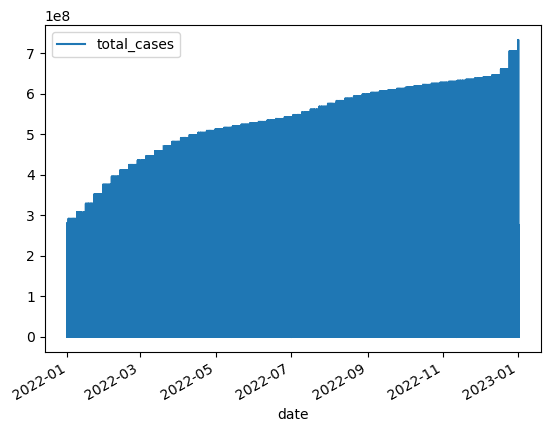

In [13]:
#totale casi 2022
start_date = '2022-01-01'
end_date = '2023-01-01'
df_2022= df[(df['date'] >= start_date) & (df['date'] <= end_date)]
df_2022.plot(x="date",y='total_cases')

**GRAFICO CASI NEL 2022**

<Axes: xlabel='date'>

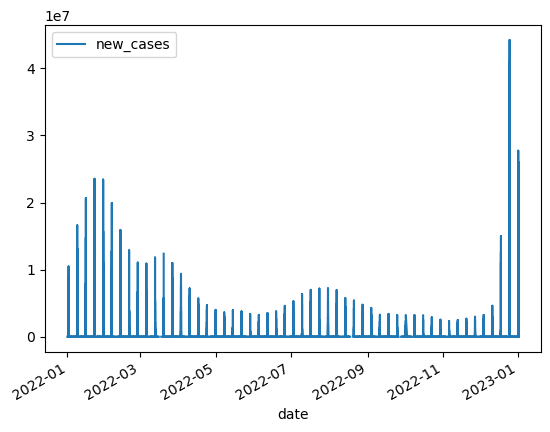

In [14]:
#nuovi casi 2022
start_date = '2022-01-01'
end_date = '2023-01-01'
df_2022= df[(df['date'] >= start_date) & (df['date'] <= end_date)]
df_2022.plot(x="date",y="new_cases")

**GRAFICO DEI NUOVI CASI NEL 2022**

C:\Users\justi\AppData\Local\Temp\ipykernel_15296\2109683356.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022.sort_values(by='date', inplace=True)
C:\Users\justi\AppData\Local\Temp\ipykernel_15296\2109683356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022["cumulativ"]= df["new_cases"].cumsum()


<Axes: xlabel='date'>

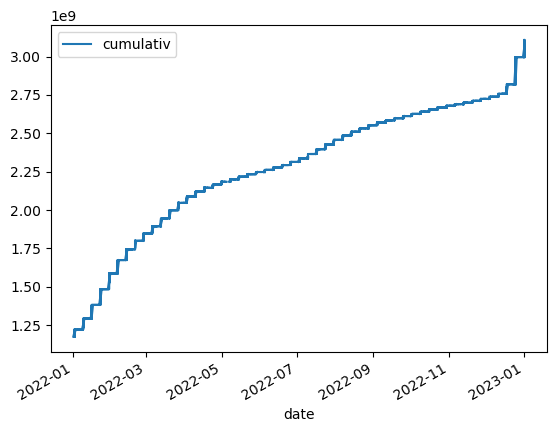

In [15]:
#somma cumulativa nuovi casi 2022
start_date = '2022-01-01'
end_date = '2023-01-01'

df_2022= df[(df['date'] >= start_date) & (df['date'] <= end_date)]
df_2022.sort_values(by='date', inplace=True)
df_2022["cumulativ"]= df["new_cases"].cumsum()

df_2022.plot(x="date",y="cumulativ")

**SOMMA CUMULATIVA NUOVI CASI 2022**

In [16]:
#pazienti in cura intensiva mag-22/mag-23
import matplotlib.pyplot as plt 

start_date = '2022-05-01'
end_date = '2023-05-01'

df_2022= df.loc[(df['date'] >= start_date) & (df['date'] <= end_date)]
df_2022.sort_values(by='date', inplace=True)

dfit_2022 = df["location"] == "Italy"
ita_x=df_2022.loc[dfit_2022].date
ita_y=df_2022.loc[dfit_2022].icu_patients

dfdth_2022 = df["location"] == "Germany"
dtch_x=df_2022.loc[dfdth_2022].date
dtch_y=df_2022.loc[dfdth_2022].icu_patients

dffr_2022 = df["location"] == "France"
fr_x=df_2022.loc[dffr_2022].date
fr_y=df_2022.loc[dffr_2022].icu_patients

plt.plot(ita_x, ita_y , label = "Italy") 
plt.plot(dtch_x, dtch_y , label = "Germany") 
plt.plot(fr_x, fr_y , label = "France") 
plt.legend()
plt.show()


C:\Users\justi\AppData\Local\Temp\ipykernel_15296\1783144049.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022.sort_values(by='date', inplace=True)


**PAZIENTI IN CURA INTENSIVA-->
OLTRE ALLA MAGGIORANZA DI RICOVERI EFFETTUATI IN FRANCIA E GERMANIA RISPETTO L'ITALIA,
DAL GRAFICO SOPRASTANTE POSSIMO EVIDENZIARE ANCHE AD OCCHIO UNA CORRELAZIONE NELL'AUMENTO E LE DISCESE DEI RICOVERI INTENSIVI IN DIVERSI PAESI UE.
OSSERVANDO INOLTRE I PICCHI DI CONTAGIO DURANTE L'ANNO, POSSIAMO VEDERE COME HANNO UNA TENDENZA A SALIRE CON LA STAGIONE INVERNALE
PER DIMINUIRE INVECE VERSO L'ESTATE**
